In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
# IMPORTING DATASET:

data = pd.read_csv('boston.csv')

# print(data.info())
print('\nColumn names in Dataset:\n',data.columns)
print('\nTop 5 data entries are:\n', data.head())
print('\nCount of rows and columns: ', data.shape)
print('\nAny missing value in a column:\n', data.isnull().sum())
# Here the .isnull() fuction checks how many missing values(or null values) are there, and .sum() will count the number of
# missing values in each column.


Column names in Dataset:
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

Top 5 data entries are:
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  price  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2  

Count of rows and columns:  (506, 14)

Any missing value in a column:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS 

In [3]:
# Attribute Information

comment = """
Input features in order:
1) CRIM: This represents the crime rate per person in the town. A higher value indicates a higher crime rate in that area, 
         which could negatively impact housing prices.
2) ZN: This is the proportion of the town's land area that is zoned for large residential lots (over 25,000 square feet). 
       Higher values indicate more land is dedicated to large homes, which often correlates with wealthier neighborhoods.
3) INDUS: This represents the percentage of land in the town that is used for non-retail commercial purposes. Higher values
           may indicate more industrial areas, which could lower housing desirability.
4) CHAS: Whether property is near Charles River or not, if yes then 1 and 0 otherwise
5) NOX: Level of air pollution in the area, measured by nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: This is the average number of rooms in the homes within the town.
7) AGE: This indicates the percentage of homes that were built before 1940 and are still occupied by their owners. A higher
        value may suggest older, possibly historic, neighborhoods.
8) DIS: Weighted distances to five Boston employment centres: This measures how far the properties are from key employment 
        centers in Boston. Shorter distances (lower values) can increase housing prices because of easier commutes.
9) RAD: Index of accessibility to radial highways. Better accessibility (higher values) can increase property desirability 
        due to easier travel.
10) TAX: This represents the property tax rate per $10,000 of property value[$/10k]. Higher tax rates may deter potential buyers
         and could negatively impact prices.
11) PTRATIO: This is the average number of students per teacher in the town’s schools. A lower ratio (fewer students per 
             teacher) is typically considered better, which can increase housing prices due to the perceived quality of schools.
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.This variable is derived 
       from the proportion of Black residents in the town. It was originally used in models exploring potential racial 
       influences on housing prices
13) LSTAT: This represents the percentage of the population in the town that is considered to be of lower socio-economic status.
           Higher values indicate more lower-income residents, which may negatively impact housing prices.
"""

In [4]:
# STATISTICAL MEASURES OF THE DATASET:

print(data.describe())
# This gives the mean, standard deviation, minimum value, etc of a particular column. Here 25% means that: 25% of values in 
# CRIM are less then 0.082045

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [5]:
# CORRELATION IN THE DATASET:

# Correlation in dataset tells us about the relationship between two different features. There are two types of correlation
# values, namely Positive correlation and Negative correlation.

print('Here is the Pearson correlation coefficient formula:')
from IPython.display import display, Math
# Display Pearson correlation formula in LaTeX
display(Math(r'r = \frac{n(\sum xy) - (\sum x)(\sum y)}{\sqrt{[n\sum x^2 - (\sum x)^2][n\sum y^2 - (\sum y)^2]}}'))
print('Where,\n n = number of data points,\n x & y = individual data points of the two features\n')

correlation_value = data.corr()
# .corr() is used to compute the correlation matrix for a given dataset data. This matrix represents the pairwise correlation 
#  between the columns (features) of the dataset.
# .corr() computes the Pearson correlation coefficient by default, which measures the linear relationship between pairs of 
# numerical columns.
# You can also specify other correlation methods:
#  1. data.corr(method='pearson') (default): Pearson correlation coefficient.
#  2. data.corr(method='kendall'): Kendall Tau correlation coefficient.
#  3. data.corr(method='spearman'): Spearman rank correlation coefficient.
# Uses of Correlation:
# 1.Feature Selection: You can use this correlation matrix to identify highly correlated features, which can be useful in 
#                      machine learning to avoid multicollinearity.
# 2.Data Understanding: It provides insight into how different features relate to each other.

print('\nThe calculated correlation values are:\n', correlation_value)
# The value at each position (i,j) represents the correlation between feature i and feature j.
# Meaning of the correlation matrix:
# The diagonal values (1.0) represent the correlation of each feature with itself, which is always 1.
# The value -1.0 between A and B indicates a perfect negative correlation (as one increases, the other decreases).
# The value 1.0 between A and C indicates a perfect positive correlation (as one increases, the other also increases).
# Example (for understanding the correlation values):
# If Size and Price have a positive correlation of 0.85, it indicates that larger houses tend to have higher prices.
# If Age of the House and Price have a negative correlation of -0.7, it suggests that older houses tend to be cheaper.


Here is the Pearson correlation coefficient formula:


<IPython.core.display.Math object>

Where,
 n = number of data points,
 x & y = individual data points of the two features


The calculated correlation values are:
              CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.

<Axes: >

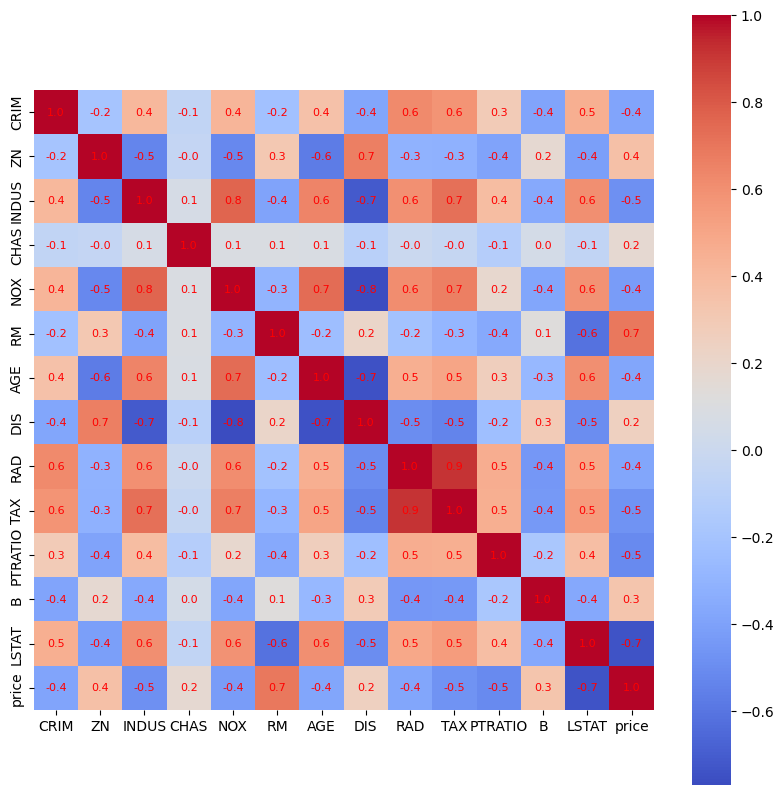

In [6]:
# CONSTRUCTING A HEATMAP TO UNDERSTAND AND VISUALIZE CORRELATION VALUES:

# A heatmap is a graphical representation of data where individual values are represented as colors.A heatmap is commonly 
# used to display matrix-like data, such as a correlation matrix with colors representing the magnitude of the values.
# sns.heatmap() is used to create heatmaps, where you can visualize relationships or patterns in your data. The cells of the
# matrix are color-coded, making it easier to see high and low values at a glance.


plt.figure(figsize=(10,10))
sns.heatmap(correlation_value, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8, 'color':'red'}, cmap='coolwarm')

# cbar stands for color bar. When cbar=true, then a color bar will be displayed on the side of the heatmap, which indicates 
# the mapping between the color intensity and the data values.
# When square=True, the cells of the heatmap are forced to have a square aspect ratio. This can make the heatmap visually 
# more symmetrical and easier to read.
# annot stands for annotation. When annot=True, the values of the data will be displayed inside the cells of the heatmap.
# This is useful for seeing the exact value in each cell. If False: No annotations (just colors).
# This specifies the format for displaying annotations inside the cells. In this case, '.1f' means to display numbers with one 
# decimal place.fmt='.0f': No decimal places (e.g., 2); fmt='.1f': One decimal place (e.g., 2.3); fmt='.2f': Two 
# decimal places (e.g., 2.34).
# annot_kws is used to customize the appearance of the annotations (the numbers inside the heatmap cells). In this case, 
# {'size':8} sets the font size of the annotations to 8.{'color':'red'}: Changes the font color to red.
# cmap stands for color map. It defines the color scheme for the heatmap. 'Blues'which ranges from light blue to dark blue,which
# ranges from light blue to dark blue, where lighter colors indicate smaller values and darker colors indicate larger values.
# Other colors can be: 'viridis': A perceptually uniform color map (ranging from yellow to purple). 'coolwarm': A 
# diverging color map (blue to red). 'Greens': A green color palette.



In [7]:
# CREATING i/p AND o/p OF THE DATASET:

x = data.drop(['price'], axis=1)
y = data['price']

print('Inputs are:\n', x)
print('\nOutput is:\n', y)

# axis=1 represents droping column, and axis=0 represents droping row

Inputs are:
         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83

In [8]:
# SLITTING DATA INTO TRAINING AND TEST DATA:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

print(x.shape, x_train.shape, x_test.shape)
print('As we can see that train has nearly 80% of data, and test has nearly 20% of data')

(506, 13) (404, 13) (102, 13)
As we can see that train has nearly 80% of data, and test has nearly 20% of data


In [9]:
# K-NEAREST NEIGHBOUR MODEL:

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsRegressor()

In [10]:
# SVM REGRESSOR MODEL:

svm_model = SVR()
svm_model.fit(x_train, y_train)

SVR()

In [11]:
# RANDOM FOREST REGRESSOR MODEL:

model = RandomForestRegressor(n_estimators=100, random_state=42)
# n_estimators=100: This parameter specifies the number of decision trees in the forest. In this case, 100 decision trees will 
# be built. The more trees you use, the more stable the predictions usually become, but it also increases computation time.
# random_state=42: This is a seed value to ensure reproducibility. By setting random_state=42, you make sure that every time  
# you run the code, the same random decisions are made (such as the random sampling of data points), which results in the 
# same model being built. You can use any integer value for random_state, or leave it out if reproducibility is not a concern.

# Traning the model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# PREDICTION OF THE MODELS ON TRAINING & TESTING DATA:

knn_training_pred = knn_model.predict(x_train)
knn_testing_pred = knn_model.predict(x_test)

svm_training_pred = svm_model.predict(x_train)
svm_testing_pred = svm_model.predict(x_test)

forest_training_pred = model.predict(x_train)
#print(forest_trainig_pred)
forest_testing_pred = model.predict(x_test)
#print(forest_testing_pred)

In [13]:
# EVALUATION OF THE MODELS ON TRAINING DATA & TESTING DATA:

# KNN MODEL:
knn_r2_error_train = metrics.r2_score(y_train, knn_training_pred)
knn_MAE_train      = metrics.mean_absolute_error(y_train, knn_training_pred)
print('KNN MODEL EVALUATION:-\n')
print('For Training data:\nR squared error: ', knn_r2_error_train, '\nMean Absolute Error: ',knn_MAE_train)
knn_r2_error_test  = metrics.r2_score(y_test, knn_testing_pred)
knn_MAE_test       = metrics.mean_absolute_error(y_test, knn_testing_pred)
print('\nFor Testing data:\nR squared error: ', knn_r2_error_test, '\nMean Absolute Error: ',knn_MAE_test)


# SVM MODEL:
svm_r2_error_train = metrics.r2_score(y_train, svm_training_pred)
svm_MAE_train      = metrics.mean_absolute_error(y_train, svm_training_pred)
print('\nSVM REGRESSOR MODEL EVALUATION:-\n')
print('For Training data:\nR squared error: ', svm_r2_error_train, '\nMean Absolute Error: ',svm_MAE_train)
svm_r2_error_test  = metrics.r2_score(y_test, svm_testing_pred)
svm_MAE_test       = metrics.mean_absolute_error(y_test, svm_testing_pred)
print('\nFor Testing data:\nR squared error: ', svm_r2_error_test, '\nMean Absolute Error: ',svm_MAE_test)


# RANDOM FOREST REGRESSOR MODEL:
forest_r2_error_train  = metrics.r2_score(y_train, forest_training_pred)
forest_MAE_train      = metrics.mean_absolute_error(y_train, forest_training_pred)
print('\nRANDOM FOREST REGRESSOR MODEL EVALUATION:-\n')
print('For Training data:\nR squared error: ', forest_r2_error_train, '\nMean Absolute Error: ',forest_MAE_train)
forest_r2_error_test  = metrics.r2_score(y_test, forest_testing_pred)
forest_MAE_test       = metrics.mean_absolute_error(y_test, forest_testing_pred)
print('\nFor Testing data:\nR squared error: ', forest_r2_error_test, '\nMean Absolute Error: ',forest_MAE_test)


KNN MODEL EVALUATION:-

For Training data:
R squared error:  0.6792888271229396 
Mean Absolute Error:  3.5709405940594054

For Testing data:
R squared error:  0.6585650274571211 
Mean Absolute Error:  3.9190196078431367

SVM REGRESSOR MODEL EVALUATION:-

For Training data:
R squared error:  0.17964669464989047 
Mean Absolute Error:  5.21736190221409

For Testing data:
R squared error:  0.2749755336369746 
Mean Absolute Error:  5.631655873506465

RANDOM FOREST REGRESSOR MODEL EVALUATION:-

For Training data:
R squared error:  0.9814768667561776 
Mean Absolute Error:  0.847480198019802

For Testing data:
R squared error:  0.8907419944957655 
Mean Absolute Error:  2.073392156862744


KNN MODEL:



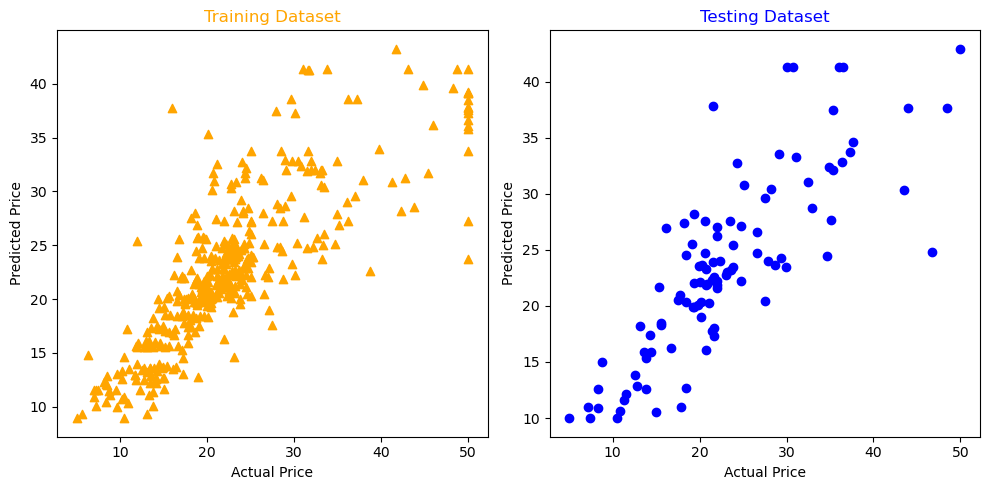


SVM REGRESSOR MODEL:



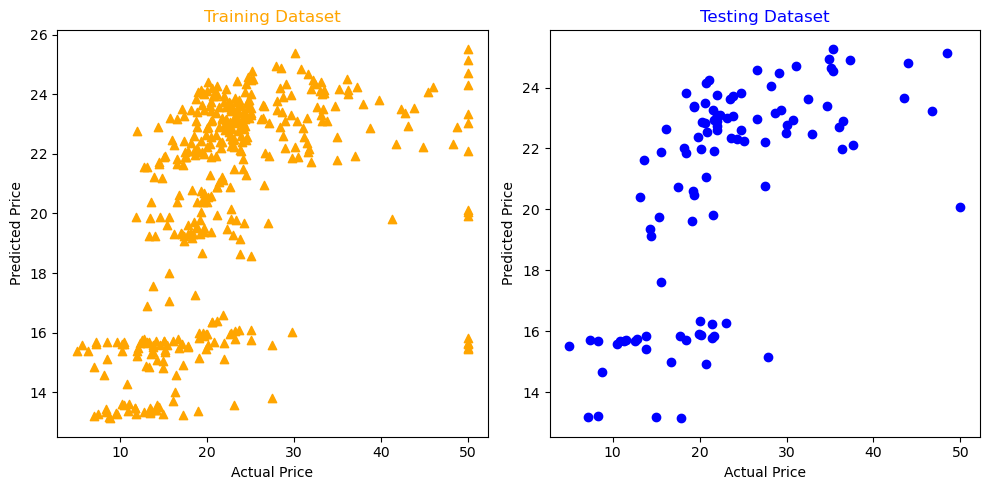


RANDOM FOREST REGRESSOR MODEL:



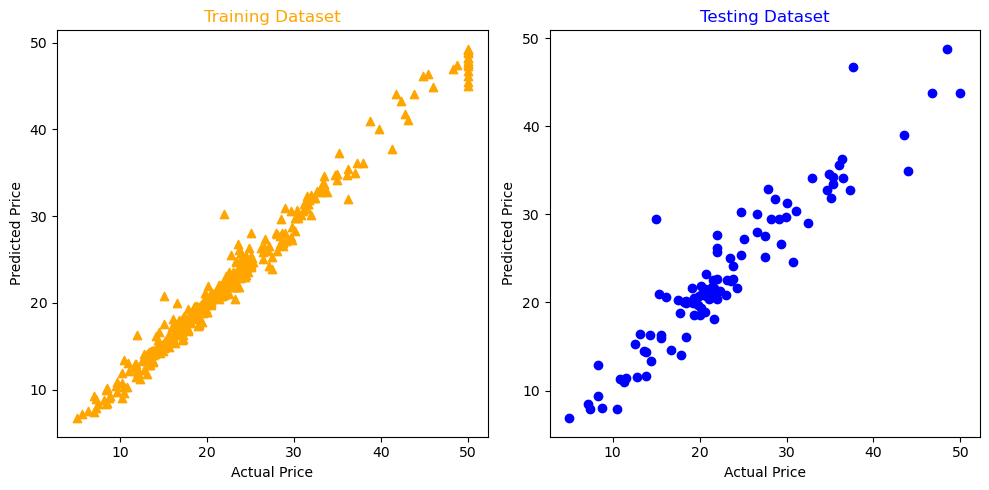

In [14]:
# MODEL PERFORMANCE VISUALISATION:

# Create a figure with 1 row and 2 columns
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed

print('KNN MODEL:\n')
# First scatter plot (Training dataset)
plt.subplot(1, 2, 1) # 1 row, 2 columns, plot 1
plt.scatter(y_train, knn_training_pred, color='orange', marker='^')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Training Dataset', color='orange')

# Second scatter plot (Testing dataset)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
plt.scatter(y_test, knn_testing_pred, color='blue')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Testing Dataset', color='blue')

# Adjust layout and display the plots
plt.tight_layout()  # Ensures there is proper spacing between plots
plt.show()

#-------------------------------------------------------------------------------------------------------------------------------

plt.figure(figsize=(10, 5))
print('\nSVM REGRESSOR MODEL:\n')

plt.subplot(1, 2, 1) 
plt.scatter(y_train, svm_training_pred, color='orange', marker='^')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Training Dataset', color='orange')

plt.subplot(1, 2, 2)  
plt.scatter(y_test, svm_testing_pred, color='blue')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Testing Dataset', color='blue')

plt.tight_layout()  
plt.show()

#-------------------------------------------------------------------------------------------------------------------------------

plt.figure(figsize=(10, 5))
print('\nRANDOM FOREST REGRESSOR MODEL:\n')

plt.subplot(1, 2, 1) 
plt.scatter(y_train, forest_training_pred, color='orange', marker='^')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Training Dataset', color='orange')

plt.subplot(1, 2, 2)  
plt.scatter(y_test, forest_testing_pred, color='blue')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Testing Dataset', color='blue')

plt.tight_layout()  
plt.show()

In [15]:
# Explanation of the function used for plotting:

comment = '''
plt.figure(figsize=(10, 5)): This creates a new figure for plotting with a specific size.
The figsize=(10, 5) argument sets the width and height of the figure in inches. In this case, the width will be 10 inches,
 and the height will be 5 inches.
The plt.figure() function sets the stage for adding subplots, charts, or other visual elements.
plt.subplot(1, 2, 1): Creates a grid with 1 row and 2 columns and places the first scatter plot in the first column.
plt.subplot(1, 2, 2): Places the second scatter plot in the second column.
plt.tight_layout(): Adjusts the spacing between the plots to make sure they are not overlapping.'''

In [16]:
# GIVING A NEW DATAPOINT AND PREDICTING ITS VALUE:

new_data = np.array([[0.02, 18.0, 5.0, 0, 0.5, 6.3, 68.0, 4.5, 3, 300, 15.0, 390.0, 4.0]])

# Predicting the target value for the new data
predicted_price = model.predict(new_data)

print(f"Predicted price for the new data is: {predicted_price[0]}")

Predicted price for the new data is: 26.92499999999999


C:\Users\HARSH\OneDrive\Documents\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
